In [1]:
import pandas as pd

file1 = "../data/coloc_R_benchmark_results.tsv"
file2 = "../data/gpu-coloc_benchmark_results.tsv"

data1 = pd.read_csv(file1, sep="\t")
data2 = pd.read_csv(file2, sep="\t")

# data1 = data1[(data1["PP.H4.abf"]>=0.8) ]
# data2 = data2[(data2["PP.H4"]>=0.8) ]

pairs1 = set(tuple(sorted([row.signal1, row.signal2])) for row in data1.itertuples())
pairs2 = set(tuple(sorted([row.signal1, row.signal2])) for row in data2.itertuples())

unique_to_file1 = pairs1 - pairs2
unique_to_file2 = pairs2 - pairs1

count_unique_file1 = len(unique_to_file1)
count_unique_file2 = len(unique_to_file2)

print(f"Number of pairs unique to {file1}: {count_unique_file1}")
print(f"Number of pairs unique to {file2}: {count_unique_file2}")

def normalize_signals(df, col1, col2):
    df['key'] = df[[col1, col2]].apply(lambda x: tuple(sorted(x)), axis=1)
    return df

df1_normalized = normalize_signals(data1, 'signal1', 'signal2')
df2_normalized = normalize_signals(data2, 'signal1', 'signal2')

merged_df = pd.merge(df1_normalized, df2_normalized, on='key', how='inner', suffixes=('_1v1', '_cache'))

merged_df['difference'] = merged_df['PP.H4.abf'] - merged_df['PP.H4']
std_dev = merged_df['difference'].std()

merged_df['difference_direction'] = merged_df['difference'].apply(lambda x: 'positive' if x > 0 else 'negative')

merged_df.drop(columns=['key'], inplace=True)

"Standard Deviation of Differences:", std_dev, "Min:", merged_df['difference'].min(), "Max:", merged_df['difference'].max(), "Mean:", merged_df['difference'].mean()

Number of pairs unique to ../data/coloc_R_benchmark_results.tsv: 423384
Number of pairs unique to ../data/gpu-coloc_benchmark_results.tsv: 114413


('Standard Deviation of Differences:',
 np.float64(0.0011283890641048718),
 'Min:',
 np.float64(-5.984863906960403e-06),
 'Max:',
 np.float64(0.11022741737352304),
 'Mean:',
 np.float64(6.992356638136283e-05))

In [2]:
merged_df.shape, merged_df[merged_df["difference"]>=0.02].shape, merged_df[merged_df["difference"]>=0.02].shape[0]/merged_df.shape[0]

((51350, 10), (9, 10), 0.00017526777020447905)

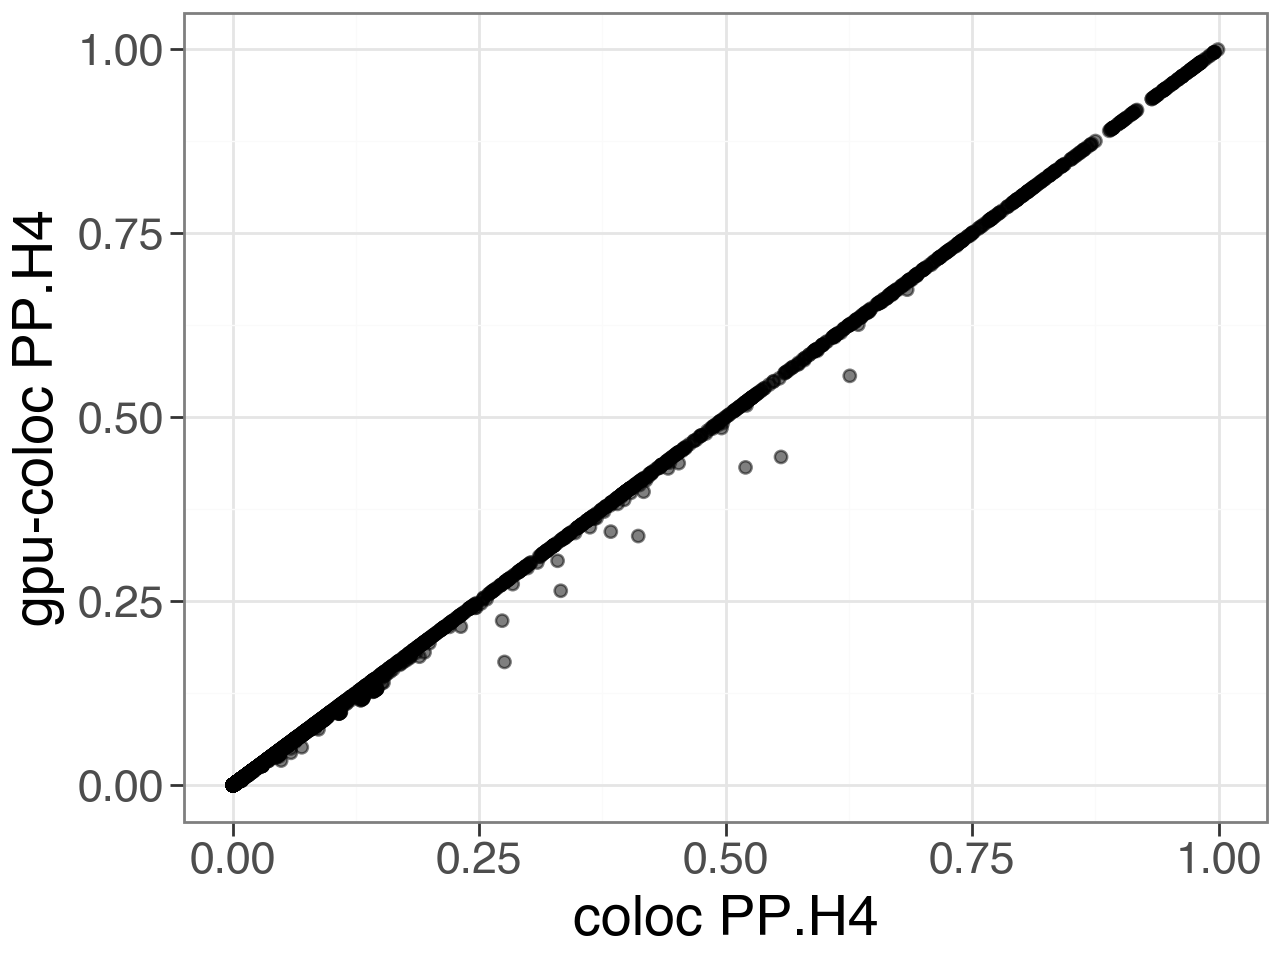

In [3]:

from plotnine import (
    ggplot, aes, geom_point, labs,
    theme_bw, theme, element_text,
    scale_color_brewer
)

(
    ggplot(merged_df, aes(x='PP.H4.abf', y='PP.H4')) +
    geom_point(size=2, alpha=0.5) +
    labs(
        x='coloc PP.H4',
        y='gpu-coloc PP.H4',
        color='Prior p12'
    ) +
    theme_bw(base_size=20) +

    scale_color_brewer(type='qual', palette='Dark2')
)